<a href="https://colab.research.google.com/github/Shiwei-Chen/ISTM-660/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Who Is the Carrier?**

In basketball world, there is a controvertial topic: During 1999-2002, Los Angeles Lakers has won three consecutive NBA titles. At that times, there are two star players in LA lakers' roster: Kobe Bryant and Shaquille O'Neal. These three titles are important components for Kobe Bryant's total 5 NBA championships, and many people argue that it was Shaq carrying Kobe to get these titles. This project will do a binary logistic regression to see whether Shaq has carried Kobe to three- straight NBA titles, and also, during 1999-2002 seasons, Kobe and Shaq, which player has contributed more to the winning of the three titles. 

**Dataset source**: https://www.basketball-reference.com/

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import pylab as pl

In [0]:
kobestats = 'https://raw.githubusercontent.com/Shiwei-Chen/ISTM-660/master/kobe%201999-2002.csv'
shaqstats = 'https://raw.githubusercontent.com/Shiwei-Chen/ISTM-660/master/shaq%201999-2002.csv'

In [0]:
kobe = pd.read_csv(kobestats)
kobe.head()

,Date,Tm,Unnamed: 2,Opp,Result2,Result,GS,MP2,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,plmi
0,12/1/99,LAL,NaN,GSW,W,1,0,29:52:00,29,7,18,0.389,0,3,0.000,5,6,0.833,3,3,6,3,0,0,2,4,19,10.3,13
1,12/3/99,LAL,NaN,POR,W,1,0,34:09:00,34,6,15,0.400,0,1,0.000,11,13,0.846,2,6,8,0,2,1,0,4,23,18.4,19
2,12/5/99,LAL,NaN,ORL,W,1,0,25:25:00,25,6,12,0.500,2,3,0.667,1,2,0.500,0,3,3,3,1,1,4,2,15,8.5,14
3,12/7/99,LAL,NaN,WAS,W,1,0,30:37:00,30,5,13,0.385,0,1,0.000,11,14,0.786,0,1,1,2,2,0,3,4,21,11.8,9
4,12/8/99,LAL,@,SAC,L,0,1,41:45:00,41,11,19,0.579,1,2,0.500,4,5,0.800,0,6,6,5,1,0,6,1,27,17.6,-8


In [0]:
#clean data
kobe.drop('Unnamed: 2', axis = 1, inplace = True)
kobe.drop('Tm', axis = 1, inplace = True)
kobe.drop('MP2', axis = 1, inplace = True)
kobe.drop('Result2', axis = 1, inplace = True)
kobe.drop('Date', axis = 1, inplace = True)
kobe.drop('Opp', axis = 1, inplace = True)
kobe.drop('MP', axis = 1, inplace = True)
kobe.head()

,Result,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,plmi
0,1,0,7,18,0.389,0,3,0.000,5,6,0.833,3,3,6,3,0,0,2,4,19,10.3,13
1,1,0,6,15,0.400,0,1,0.000,11,13,0.846,2,6,8,0,2,1,0,4,23,18.4,19
2,1,0,6,12,0.500,2,3,0.667,1,2,0.500,0,3,3,3,1,1,4,2,15,8.5,14
3,1,0,5,13,0.385,0,1,0.000,11,14,0.786,0,1,1,2,2,0,3,4,21,11.8,9
4,0,1,11,19,0.579,1,2,0.500,4,5,0.800,0,6,6,5,1,0,6,1,27,17.6,-8


In [0]:
kobe.isnull().sum().any()
sum(kobe.count()-len(kobe))

0

In [0]:
shaq = pd.read_csv(shaqstats)
shaq.head()

,Date,Age,Tm,Unnamed: 3,Opp,Result2,Result,GS,MP2,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,plmi
0,11/2/99,27-241,LAL,@,UTA,W,1,1,34:26:00,34,9,20,0.450,0,0,0,5,11,0.455,5,8,13,1,1,2,2,4,23,15.6,16
1,11/3/99,27-242,LAL,NaN,VAN,W,1,1,33:55:00,33,13,22,0.591,0,0,0,2,6,0.333,4,6,10,4,0,3,1,3,28,23.5,17
2,11/6/99,27-245,LAL,@,POR,L,0,1,33:08:00,33,9,14,0.643,0,0,0,3,11,0.273,4,6,10,0,0,2,2,0,21,15.6,-5
3,11/7/99,27-246,LAL,NaN,DAL,W,1,1,37:04:00,37,10,14,0.714,0,0,0,10,23,0.435,5,15,20,1,1,1,2,5,30,25.4,17
4,11/9/99,27-248,LAL,@,DAL,W,1,1,38:09:00,38,12,16,0.750,0,0,0,3,14,0.214,4,6,10,2,0,3,7,5,27,15.3,19


In [0]:
#Clean data
shaq.drop('Unnamed: 3', axis = 1, inplace = True)
shaq.drop('Tm', axis = 1, inplace = True)
shaq.drop('Age', axis = 1, inplace = True)
shaq.drop('MP2', axis = 1, inplace = True)
shaq.drop('Result2', axis = 1, inplace = True)
shaq.drop('Date', axis = 1, inplace = True)
shaq.drop('Opp', axis = 1, inplace = True)
shaq.drop('MP', axis = 1, inplace = True)
shaq.head()

,Result,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,plmi
0,1,1,9,20,0.450,0,0,0,5,11,0.455,5,8,13,1,1,2,2,4,23,15.6,16
1,1,1,13,22,0.591,0,0,0,2,6,0.333,4,6,10,4,0,3,1,3,28,23.5,17
2,0,1,9,14,0.643,0,0,0,3,11,0.273,4,6,10,0,0,2,2,0,21,15.6,-5
3,1,1,10,14,0.714,0,0,0,10,23,0.435,5,15,20,1,1,1,2,5,30,25.4,17
4,1,1,12,16,0.750,0,0,0,3,14,0.214,4,6,10,2,0,3,7,5,27,15.3,19


In [0]:
shaq.isnull().sum().any()
sum(shaq.count()-len(shaq))

0

Now the data has been imported and cleaned. The rest of data are crucial stats for evaluating player's performance. 

- **Opp**: opponent
- **Result**: Game result, dependent variable for this project. 1 for win, 0 for lose
- **GS**: Start for the game? 1 = yes, 0 = no
- **MP**: Minutes played
- **FG**: Field goal
- **FGA**: Field goal attempt
- **FG%**: Field goal percentage
- **3P**: Three-pointer made
- **3PA**: Three-pointer attempt
- **3P%**: Three-pointer field goal percentage
- **FT**: Free throw
- **FTA**: Free throw attempt
- **FT%**: Free throw field goal percentage
- **ORB**: Offensive rebound
- **DRB**: Defensive Rebound
- **TRB**: Total rebound
- **AST**: Assists
- **STL**: steal
- **BLK**: Block
- **TOV**: turnover
- **PF**: Personal foul
- **PTS**: Points
- **Game score**: Points x 1.0) + (FGM x 0.4) + (FGA x -0.7) + ((FTA-FTM) x -0.4) + (OREB x 0.7) + (DREB x 0.3) + (STL x 1.0) + (AST x 0.7) + (BLK x 0.7) + (PF x -0.4) + (TO x -1.0)
- **plmi**: Plus/Minus. Reflection on how the team did while that player is on the court. If a player has a +5 plmi, it means his team outscored the opponent by 5 points while he was on the court. 


Now, use data visualization to compare this two players' some important average stats. 

In [0]:
#@title Kobe Average Stats
kptsm = kobe['PTS'].mean()
ktrbm = kobe['TRB'].mean()
kastm = kobe['AST'].mean()
kblkm = kobe['BLK'].mean()
kgmscm = kobe['GmSc'].mean()
kpmm = kobe['plmi'].mean()
kfgm = kobe['FG%'].mean()
k3pm = kobe['3P%'].mean()
kftm = kobe['FT%'].mean()
print('Kobe Stats: \nPTS: ' + str(kptsm) + ' TRB: '+ str(ktrbm) + ' AST: '+ str(kastm) + ' BLK: ' + str(kblkm) + ' GmSc: '+ str(kgmscm) + ' Plus/Minus: '+ str(kpmm) +'\nFG%: '+ str(kfgm) +' 3P%: ' + str(k3pm) + ' FT%: ' +str(kftm))

Kobe Stats: 
PTS: 25.40221402214022 TRB: 5.833948339483395 AST: 5.092250922509225 BLK: 0.7416974169741697 GmSc: 18.29114391143913 Plus/Minus: 6.158671586715867
FG%: 0.4633948339483397 3P%: 0.24830627306273056 FT%: 0.8091217712177127


In [0]:
#@title Shaq Average Stats
sptsm = shaq['PTS'].mean()
strbm = shaq['TRB'].mean()
sastm = shaq['AST'].mean()
sblkm = shaq['BLK'].mean()
sgmscm = shaq['GmSc'].mean()
spmm = shaq['plmi'].mean()
sfgm = shaq['FG%'].mean()
s3pm = shaq['3P%'].mean()
sftm = shaq['FT%'].mean()
print('Shaq Stats: \nPTS: ' + str(sptsm) + ' TRB: '+ str(strbm) + ' AST: '+ str(sastm) + ' BLK: ' + str(sblkm) + ' GmSc: '+ str(sgmscm) + ' Plus/Minus: '+ str(spmm) + '\nFG%: '+ str(sfgm) +' 3P%: ' + str(s3pm) + ' FT%: ' +str(sftm))

Shaq Stats: 
PTS: 28.8705035971223 TRB: 12.856115107913668 AST: 3.4244604316546763 BLK: 2.593525179856115 GmSc: 23.41438848920864 Plus/Minus: 7.758992805755396
FG%: 0.5710971223021579 3P%: 0.0 FT%: 0.5259964028776978


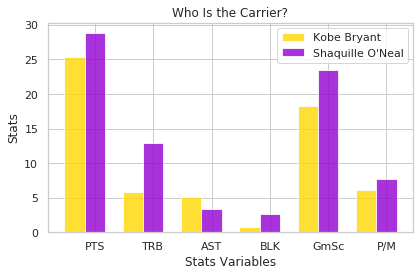

In [0]:
#@title Data Visualization for Performance
n_groups = 6
means_kobe = (kptsm, ktrbm, kastm, kblkm, kgmscm, kpmm)
means_shaq = (sptsm, strbm, sastm, sblkm, sgmscm, spmm)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

stats1 = plt.bar(index, means_kobe, bar_width,
alpha=opacity,
color='gold',
label='Kobe Bryant')

stats2 = plt.bar(index + bar_width, means_shaq, bar_width,
alpha=opacity,
color='darkviolet',
label="Shaquille O'Neal")

plt.xlabel('Stats Variables')
plt.ylabel('Stats')
plt.title('Who Is the Carrier?')
plt.xticks(index + bar_width, ('PTS', 'TRB', 'AST', 'BLK','GmSc', 'P/M'))
plt.legend()

plt.tight_layout()
plt.show()

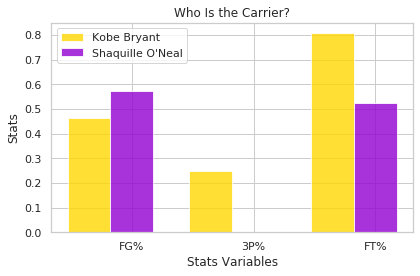

In [0]:
#@title Data Visualization for Efficiency
n_groups1 = 3
means_kobe1 = (kfgm, k3pm, kftm)
means_shaq1 = (sfgm, s3pm, sftm)

fig, ax = plt.subplots()
index1 = np.arange(n_groups1)
bar_width1 = 0.35
opacity1 = 0.8

stats3 = plt.bar(index1, means_kobe1, bar_width1,
alpha=opacity,
color='gold',
label='Kobe Bryant')

stats4 = plt.bar(index1 + bar_width1, means_shaq1, bar_width1,
alpha=opacity,
color='darkviolet',
label="Shaquille O'Neal")

plt.xlabel('Stats Variables')
plt.ylabel('Stats')
plt.title('Who Is the Carrier?')
plt.xticks(index1 + bar_width1, ('FG%', '3P%', 'FT%'))
plt.legend()

plt.tight_layout()
plt.show()

It looks like Shaq was topping Kobe through these 1999-2002. It is no wonder because Shaq was at his best age, 27-29, and Kobe just started his career at the age of 21-23. Further provements will be needed. 

# **Data exploration**

It is necessary to look at depentdent variable 'result', and to see what is the win percentage for LA Lakers in the three consecutive championship period. 

In [0]:
kobe['Result'].value_counts()

1    201
0     70
Name: Result, dtype: int64

In [0]:
count_kobe_win = len(kobe[kobe['Result']== 1])
count_kobe_lose =len(kobe[kobe['Result']== 0])
pct_kobe_win = count_kobe_win/(count_kobe_win + count_kobe_lose)
print("Games with Kobe win percentage is", pct_kobe_win*100)
pct_kobe_lose = count_kobe_lose/(count_kobe_win+count_kobe_lose)
print("Games with Kobe lose percentage is", pct_kobe_lose*100)

Games with Kobe win percentage is 74.16974169741697
Games with Kobe lose percentage is 25.830258302583026


In [0]:
shaq['Result'].value_counts()

1    213
0     65
Name: Result, dtype: int64

In [0]:
count_shaq_win = len(shaq[shaq['Result']== 1])
count_shaq_lose =len(shaq[shaq['Result']== 0])
pct_shaq_win = count_shaq_win/(count_shaq_win + count_shaq_lose)
print("Games with Shaq win percentage is", pct_shaq_win*100)
pct_shaq_lose = count_shaq_lose/(count_shaq_win+count_shaq_lose)
print("Games with Shaq lose percentage is", pct_shaq_lose*100)

Games with Shaq win percentage is 76.61870503597122
Games with Shaq lose percentage is 23.381294964028775


Using .groupby method, we can compare two players' stats depend on the game result. 

In [0]:
kobe.groupby('Result').mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,plmi
Result,,,,,,,,,,,,,,,,,,,,,
0,1.0000,9.128571,21.942857,0.405657,0.700000,2.928571,0.184386,5.671429,7.000000,0.778571,1.571429,3.871429,5.442857,4.571429,1.428571,0.585714,3.414286,3.657143,24.628571,14.811429,-8.200000
1,0.9801,9.422886,19.587065,0.483502,0.726368,2.124378,0.270567,6.099502,7.368159,0.819761,1.477612,4.492537,5.970149,5.273632,1.601990,0.796020,2.716418,3.089552,25.671642,19.502985,11.159204


In [0]:
shaq.groupby('Result').mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,plmi
Result,,,,,,,,,,,,,,,,,,,,,
0,1.000000,11.200000,20.415385,0.547508,0.0,0.015385,0.0,5.846154,12.076923,0.469692,4.553846,7.584615,12.138462,3.030769,0.461538,2.092308,3.061538,3.446154,28.246154,21.013846,-6.415385
1,0.995305,11.422535,19.821596,0.578296,0.0,0.014085,0.0,6.215962,11.417840,0.543178,3.957746,9.117371,13.075117,3.544601,0.582160,2.746479,2.760563,3.145540,29.061033,24.146948,12.084507


Results shows that both players performed better when the team won the games. 

# **Performing Regression**

Since the variable are all numbers, there is no neeed to create dummy variables. 

# **Kobe Bryant**

In [0]:
#@title Step 1
#Kobe Bryant
import statsmodels.api as sm
kobe_train_cols = kobe.columns[1:]
kobelogit = sm.Logit(kobe['Result'], kobe[kobe_train_cols])
koberesult = kobelogit.fit()
print(koberesult.summary())

         Current function value: 0.137655
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  271
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                           17
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.7590
Time:                        04:40:21   Log-Likelihood:                -37.304
converged:                      False   LL-Null:                       -154.82
Covariance Type:            nonrobust   LLR p-value:                 2.358e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GS            -4.5374      3.659     -1.240      0.215     -11.710       2.635
FG            -0.3616   2.29e+06  -1.58e-07      1.000    -4.5e+0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


It seems like plus/minus is a cpmplete quasi-separation. This is not weird because plus/minus reflect the relationship between player's performance and game result so directly. Thus, drop 'plmi' and see what will happen. Also, some stats which are not that important are dropped to reduce the computer run time. 

In [0]:
#@title Clean Data
kobe2 = kobe
kobe2.drop('plmi', axis = 1, inplace = True)
kobe2.drop('GS', axis = 1, inplace = True)
kobe2.drop('FG', axis = 1, inplace = True)
kobe2.drop('FGA', axis = 1, inplace = True)
kobe2.drop('3PA', axis = 1, inplace = True)
kobe2.drop('3P%', axis = 1, inplace = True)
kobe2.drop('FT', axis = 1, inplace = True)
kobe2.drop('FTA', axis = 1, inplace = True)
kobe2.drop('3P', axis = 1, inplace = True)
kobe2.drop('ORB', axis = 1, inplace = True)
kobe2.drop('DRB', axis = 1, inplace = True)
kobe2.drop('STL', axis = 1, inplace = True)
kobe2.drop('BLK', axis = 1, inplace = True)
kobe2.head()

,Result,FG%,FT%,TRB,AST,TOV,PF,PTS,GmSc
0,1,0.389,0.833,6,3,2,4,19,10.3
1,1,0.400,0.846,8,0,0,4,23,18.4
2,1,0.500,0.500,3,3,4,2,15,8.5
3,1,0.385,0.786,1,2,3,4,21,11.8
4,0,0.579,0.800,6,5,6,1,27,17.6


In [0]:
#@title Step 2
kobe2_train_cols = kobe2.columns[1:]
kobelogit2 = sm.Logit(kobe2['Result'], kobe2[kobe2_train_cols])
koberesult2 = kobelogit2.fit()
print(koberesult2.summary())

Optimization terminated successfully.
         Current function value: 0.445733
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  271
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                            7
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.2198
Time:                        04:40:21   Log-Likelihood:                -120.79
converged:                       True   LL-Null:                       -154.82
Covariance Type:            nonrobust   LLR p-value:                 3.669e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG%            5.8982      1.816      3.248      0.001       2.339       9.458
FT%            0.8246      0.

After the performing logistic regression for Kobe Bryant's stats, variables 'FG%', 'PTS', and 'GmSc' can be kept because their P value < 0.05, which tells these variables are significantly associate with dependent variables. 

In [0]:
#@title Clean Data
kobe3 = kobe2
kobe3.drop('FT%', axis = 1, inplace = True)
kobe3.drop('TRB', axis = 1, inplace = True)
kobe3.drop('AST', axis = 1, inplace = True)
kobe3.drop('TOV', axis = 1, inplace = True)
kobe3.drop('PF', axis = 1, inplace = True)
kobe3.head()

,Result,FG%,PTS,GmSc
0,1,0.389,19,10.3
1,1,0.400,23,18.4
2,1,0.500,15,8.5
3,1,0.385,21,11.8
4,0,0.579,27,17.6


In [0]:
#@title Step 3
kobe3_train_cols = kobe3.columns[1:]
kobelogit3 = sm.Logit(kobe3['Result'], kobe3[kobe3_train_cols])
koberesult3 = kobelogit3.fit()
print(koberesult3.summary())

Optimization terminated successfully.
         Current function value: 0.454102
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  271
Model:                          Logit   Df Residuals:                      268
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.2051
Time:                        04:40:21   Log-Likelihood:                -123.06
converged:                       True   LL-Null:                       -154.82
Covariance Type:            nonrobust   LLR p-value:                 1.620e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG%            4.8540      1.428      3.399      0.001       2.055       7.653
PTS           -0.2238      0.

# **Shaqille O'Neal**

In [0]:
#@title Step 1(re-run the data input and data clean step if error)
import statsmodels.api as sm
shaq1 = shaq
shaq1.drop('3P%', axis = 1, inplace = True)
shaq1.drop('3P', axis = 1, inplace = True)
shaq_train_cols = shaq1.columns[1:]
print(shaq_train_cols)
shaq = shaq1
shaqlogit = sm.Logit(shaq['Result'], shaq[shaq_train_cols])
shaqresult = shaqlogit.fit()
print(shaqresult.summary())

Index(['GS', 'FG', 'FGA', 'FG%', '3PA', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'plmi'],
      dtype='object')
         Current function value: 0.201049
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  278
Model:                          Logit   Df Residuals:                      262
Method:                           MLE   Df Model:                           15
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.6303
Time:                        04:40:21   Log-Likelihood:                -55.892
converged:                      False   LL-Null:                       -151.19
Covariance Type:            nonrobust   LLR p-value:                 1.720e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Here the problem is same as the step 1 problem above. Plus/minus is a quasi-separation. Therefore, what should be done is to drop some useless stats for Shaq. 

In [0]:
#@title Clean Data
shaq2 = shaq
shaq2.drop('plmi', axis = 1, inplace = True)
shaq2.drop('GS', axis = 1, inplace = True)
shaq2.drop('FG', axis = 1, inplace = True)
shaq2.drop('FGA', axis = 1, inplace = True)
shaq2.drop('3PA', axis = 1, inplace = True)
shaq2.drop('FT', axis = 1, inplace = True)
shaq2.drop('FTA', axis = 1, inplace = True)
shaq2.drop('STL', axis = 1, inplace = True)
shaq2.drop('PF', axis = 1, inplace = True)
shaq2.drop('ORB', axis = 1, inplace = True)
shaq2.drop('DRB', axis = 1, inplace = True)
shaq2.head()

,Result,FG%,FT%,TRB,AST,BLK,TOV,PTS,GmSc
0,1,0.450,0.455,13,1,2,2,23,15.6
1,1,0.591,0.333,10,4,3,1,28,23.5
2,0,0.643,0.273,10,0,2,2,21,15.6
3,1,0.714,0.435,20,1,1,2,30,25.4
4,1,0.750,0.214,10,2,3,7,27,15.3


In [0]:
#@title Step 2
shaq2_train_cols = shaq2.columns[1:]
shaqlogit2 = sm.Logit(shaq2['Result'], shaq2[shaq2_train_cols])
shaqresult2 = shaqlogit2.fit()
print(shaqresult2.summary())

Optimization terminated successfully.
         Current function value: 0.481998
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  278
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            7
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.1137
Time:                        04:40:21   Log-Likelihood:                -134.00
converged:                       True   LL-Null:                       -151.19
Covariance Type:            nonrobust   LLR p-value:                 1.458e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG%            1.1361      1.238      0.918      0.359      -1.290       3.562
FT%            2.0450      0.

Very interesting, the output shows that Shaq's free throw has a significant relationship with the game result. However, the relationship between total rebound or field goal percentage and result is not significant. The variables stay are 'FT%', 'PTS', 'GmSc'.

In [0]:
#@title Clean Data
shaq3 = shaq2
shaq3.drop('FG%', axis = 1, inplace = True)
shaq3.drop('TRB', axis = 1, inplace = True)
shaq3.drop('AST', axis = 1, inplace = True)
shaq3.drop('BLK', axis = 1, inplace = True)
shaq3.drop('TOV', axis = 1, inplace = True)
shaq3.head()

,Result,FT%,PTS,GmSc
0,1,0.455,23,15.6
1,1,0.333,28,23.5
2,0,0.273,21,15.6
3,1,0.435,30,25.4
4,1,0.214,27,15.3


In [0]:
#@title Step 3
shaq3_train_cols = shaq3.columns[1:]
shaqlogit3 = sm.Logit(shaq3['Result'], shaq3[shaq3_train_cols])
shaqresult3 = shaqlogit3.fit()
print(shaqresult3.summary())

Optimization terminated successfully.
         Current function value: 0.487315
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  278
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.1039
Time:                        04:41:04   Log-Likelihood:                -135.47
converged:                       True   LL-Null:                       -151.19
Covariance Type:            nonrobust   LLR p-value:                 1.497e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FT%            2.3846      0.776      3.073      0.002       0.864       3.905
PTS           -0.1688      0.

# **Odd's Ratio**

Now, it is time to see how significant these relationships are.

In [0]:
#@title Kobe Bryant
print(np.exp(koberesult3.params))

FG%     128.253496
PTS       0.799485
GmSc      1.302788
dtype: float64


In [0]:
#@title Shaquille O'Neal
print(np.exp(shaqresult3.params))

FT%     10.854245
PTS      0.844687
GmSc     1.237281
dtype: float64


# **Result**

Odd's ratio formula:

odds ratioo = odds(win/variable + 1unit)/odds(win/variable)

It is very intersting to see the outcomes. Both players' odds ratio on PTS shows that every more points they got will decrease the team's odds of winning. For Kobe, if he get 1 point less, LA Lakers odds of winning will increase 1.26 times. For Shaq, if he get 1 point less, LA Lakers odds of winning will increase 1.19 times. 

For their unique variables, FT% and FG%, since these two are between 0-1, odds ratio cannot really tell something but it can be known that if Kobe's FG% and Shaq's FT% increase, the odds of Lakers winning the game will increase. 

Finally, from the variable for overall performance, Game Score, we can tell whose contribution is more. If Kobe Bryant's Game Score increase by 1 unit, Lakers odds of winning a game will increase 1.30 times. If Shaquille O'Neal's Game Score increase by 1 unit, Lakers odds of winning a game will increase 1.23 times. Kobe contribute slightly more than Shaq. 

In conclusion, this project proves that many people's arguments are untenable. At least Shaq did not carry Kobe to get three consecutive NBA titles. They both carry LA Lakers and Kobe even did more. 